In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import random
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor

#Common Model Helpers
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D, Dropout, SpatialDropout2D, BatchNormalization, Input, Activation, Dense, Flatten
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img

import shutil

Using TensorFlow backend.


The data contains the following values:

    suite_id - each suite corresponds to a set of handwritten samples by one volunteer;
    sample_id - each sample wil contain a complete set of 15 characters for Chinese numbers;
    code - for each Chinese character we are using a code, with values from 1 to 15;
    value - this is the actual numerical value associated with the Chinese character for number;
    character - the Chinese character;

We index the files in the dataset by forming a file name from suite_id, sample_id and code. The pattern for a file is as following:

"input_{suiteid}{sampleid}{code}.jpg"

# 1. Data Peek:

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'archive(1).zip',
 'chinese_mnist.csv',
 'chinese_mnist.ipynb',
 'data']

In [3]:
df = pd.read_csv('chinese_mnist.csv')

In [4]:
df.head(3)

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九


In [5]:
df.tail(3)

,suite_id,sample_id,code,value,character
14997,99,7,9,8,八
14998,99,8,9,8,八
14999,99,9,9,8,八


In [6]:
df.sample(3)

,suite_id,sample_id,code,value,character
606,63,6,10,9,九
14833,84,3,9,8,八
11772,79,2,6,5,五


In [7]:
df.shape

(15000, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   suite_id   15000 non-null  int64 
 1   sample_id  15000 non-null  int64 
 2   code       15000 non-null  int64 
 3   value      15000 non-null  int64 
 4   character  15000 non-null  object
dtypes: int64(4), object(1)
memory usage: 586.1+ KB


In [9]:
df.isnull().sum().sum()

0

In [10]:
df['code'].value_counts()

15    1000
7     1000
14    1000
6     1000
13    1000
5     1000
12    1000
4     1000
11    1000
3     1000
10    1000
2     1000
9     1000
1     1000
8     1000
Name: code, dtype: int64

# 2. Load the Data:

In [11]:
os.listdir()

['.ipynb_checkpoints',
 'archive(1).zip',
 'chinese_mnist.csv',
 'chinese_mnist.ipynb',
 'data']

In [12]:
directory = os.getcwd() + '\\data\\data'

In [13]:
os.listdir(directory)[0:5]

['input_100_10_1.jpg',
 'input_100_10_10.jpg',
 'input_100_10_11.jpg',
 'input_100_10_12.jpg',
 'input_100_10_13.jpg']

In [14]:
print(len(os.listdir(directory)))

15000


In [15]:
file_names = [os.path.join(directory, fname) for fname in os.listdir(directory)]

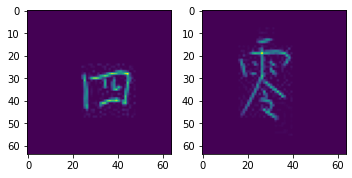

In [16]:
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows =1,figsize = (5,5))

img1 = mpimg.imread(file_names[random.randint(0,15000)])
ax1.imshow(img1)

img2 = mpimg.imread(file_names[random.randint(0,15000)])
ax2.imshow(img2)

plt.tight_layout()

"input_{suiteid}{sampleid}{code}.jpg"

In [17]:
df.head(3)

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九


In [18]:
def create_file_name(x):
    
    file_name = f"input_{x[0]}_{x[1]}_{x[2]}.jpg"
    return file_name

In [19]:
df['filename'] = df.apply(create_file_name,axis =1)

In [20]:
df['w'] = 64
df['h'] = 64

In [21]:
df.head()

,suite_id,sample_id,code,value,character,filename,w,h
0,1,1,10,9,九,input_1_1_10.jpg,64,64
1,1,10,10,9,九,input_1_10_10.jpg,64,64
2,1,2,10,9,九,input_1_2_10.jpg,64,64
3,1,3,10,9,九,input_1_3_10.jpg,64,64
4,1,4,10,9,九,input_1_4_10.jpg,64,64


# 3. Create the Train/Validation/Test Split:

In [22]:
train_df, test_df = train_test_split(df, test_size=0.2,stratify=df["code"].values)

In [23]:
display(train_df.shape)
display(test_df.shape)

(12000, 8)

(3000, 8)

In [24]:
train_df, val_df = train_test_split(train_df, test_size=0.15, stratify=train_df["code"].values)

In [25]:
display(train_df.shape)
display(val_df.shape)
display(test_df.shape)

(10200, 8)

(1800, 8)

(3000, 8)

# 4. Create Train/Valid/Test Directory:

In [26]:
main_directory = os.getcwd() + '\\data\\data\\'
train_directory = main_directory + '\\train'
valid_directory = main_directory + '\\valid'
test_directory = main_directory + '\\test'

In [27]:
train_fnames = list(main_directory + train_df['filename'])
valid_fnames = list(main_directory + val_df['filename'])
test_fnames = list(main_directory + test_df['filename'])

In [28]:
try:
    os.mkdir(train_directory)
    os.mkdir(valid_directory)
    os.mkdir(test_directory)
except OSError:
    pass

In [29]:
os.listdir(os.getcwd() +'\\data')

['data']

# 5. Move Train/Valid/Test Files into Corresponding Directory:

In [30]:
def move_files(destination, split):
    for file in split:
        shutil.move(file, destination)

In [31]:
move_files(train_directory,train_fnames)

In [32]:
move_files(valid_directory,valid_fnames)

In [33]:
move_files(test_directory,test_fnames)

# 6. Load in the image Data:

In [34]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)

validation_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
earlystop = EarlyStopping(patience=10)


learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [36]:
callbacks = [earlystop, learning_rate_reduction]

In [45]:
train_df['code'] = train_df['code'].astype('str')
val_df['code'] = val_df['code'].astype('str')
test_df['code'] = test_df['code'].astype('str')

C:\Users\jeffr\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_directory, 
    x_col='filename',
    y_col='code',
    target_size=(64,64),
    class_mode='categorical',
    batch_size=32)

Found 10200 validated image filenames belonging to 15 classes.


In [46]:
validation_generator = validation_datagen.flow_from_dataframe(
    val_df, 
    valid_directory, 
    x_col='filename',
    y_col='code',
    target_size=(64,64),
    class_mode='categorical',
    batch_size=32)

Found 1800 validated image filenames belonging to 15 classes.


In [47]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 64, 64, 3)
labels batch shape: (32, 15)


In [51]:
example = train_df.sample(n=1).reset_index(drop=True)

example_generator = train_datagen.flow_from_dataframe(
    example, 
    train_directory, 
    x_col='filename',
    y_col='code',
    target_size=(64,64),
    class_mode='categorical')

Found 1 validated image filenames belonging to 1 classes.


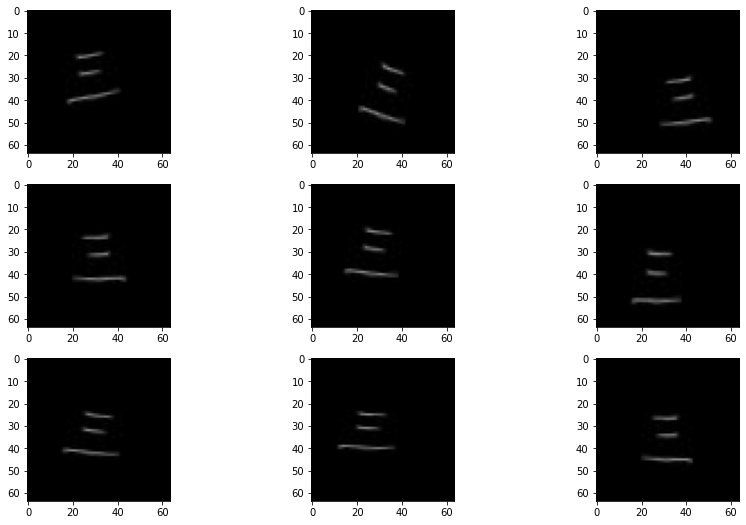

In [52]:
plt.figure(figsize=(12, 12))

for i in range(0, 9):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break

plt.tight_layout()
plt.show()

# 7. Model:

In [54]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)            

In [56]:
history = model.fit_generator(train_generator,epochs=10,validation_data=validation_generator,validation_steps=50,callbacks = callbacks)

Epoch 1/10
319/319 [==============================] - 319s 999ms/step - loss: 1.7661 - accuracy: 0.4725 - val_loss: 4.0665 - val_accuracy: 0.0681
Epoch 2/10


C:\Users\jeffr\Anaconda3\envs\ml\lib\site-packages\keras\callbacks\callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


319/319 [==============================] - 186s 582ms/step - loss: 0.7548 - accuracy: 0.7433 - val_loss: 1.7518 - val_accuracy: 0.5901
Epoch 3/10
319/319 [==============================] - 185s 581ms/step - loss: 0.5276 - accuracy: 0.8225 - val_loss: 0.4840 - val_accuracy: 0.8890
Epoch 4/10
319/319 [==============================] - 182s 571ms/step - loss: 0.4145 - accuracy: 0.8557 - val_loss: 0.0778 - val_accuracy: 0.9511
Epoch 5/10
319/319 [==============================] - 172s 539ms/step - loss: 0.3774 - accuracy: 0.8735 - val_loss: 0.1279 - val_accuracy: 0.9645
Epoch 6/10
319/319 [==============================] - 184s 578ms/step - loss: 0.3264 - accuracy: 0.8925 - val_loss: 0.0547 - val_accuracy: 0.9702
Epoch 7/10
319/319 [==============================] - 185s 579ms/step - loss: 0.2891 - accuracy: 0.9029 - val_loss: 0.1206 - val_accuracy: 0.9651
Epoch 8/10
319/319 [==============================] - 181s 567ms/step - loss: 0.2833 - accuracy: 0.9058 - val_loss: 0.4786 - val_accura

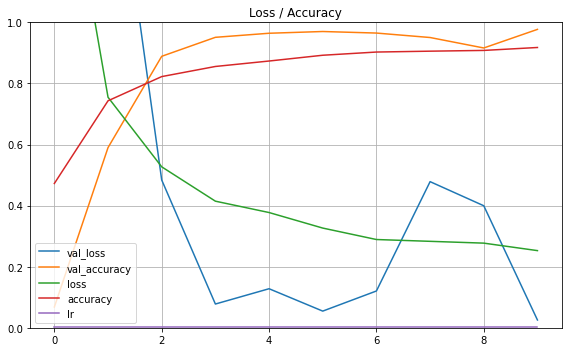

In [57]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.title('Loss / Accuracy')

plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]

plt.tight_layout()
plt.show()

In [72]:
model.evaluate_generator(validation_generator)

[0.001779362210072577, 0.9777777791023254]

In [58]:
model.save('chinese_mnist.h5')

# 8. Predictions:

In [69]:
test_gen = ImageDataGenerator(rescale=1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df, 
    test_directory, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(64,64),
    batch_size=32,
    shuffle=False)

Found 3000 validated image filenames.


In [62]:
predictions = model.predict_generator(test_generator)

In [90]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())

In [91]:
label_map

{0: '1',
 1: '10',
 2: '11',
 3: '12',
 4: '13',
 5: '14',
 6: '15',
 7: '2',
 8: '3',
 9: '4',
 10: '5',
 11: '6',
 12: '7',
 13: '8',
 14: '9'}

In [93]:
test_df['label'] = np.argmax(predictions, axis =-1)
test_df['label'] = test_df['label'].replace(label_map)

In [156]:
test_df.head(3)

,suite_id,sample_id,code,value,character,filename,w,h,label
193,26,3,10,9,九,input_26_3_10.jpg,64,64,10
1624,65,4,11,10,十,input_65_4_11.jpg,64,64,11
6115,19,5,1,0,零,input_19_5_1.jpg,64,64,1


In [170]:
final_df = test_df[['character','filename','code','label']]

In [171]:
final_df

,character,filename,code,label
193,九,input_26_3_10.jpg,10,10
1624,十,input_65_4_11.jpg,11,11
6115,零,input_19_5_1.jpg,1,1
14500,八,input_54_1_9.jpg,9,9
1684,十,input_70_4_11.jpg,11,11
...,...,...,...,...
3379,千,input_42_9_13.jpg,13,13
8564,二,input_6_4_3.jpg,3,3
10561,四,input_6_10_5.jpg,5,5
2675,百,input_7_5_12.jpg,12,12


# 9. Accuracy:

In [172]:
final_df['correct'] = final_df['code'] == final_df['label']

C:\Users\jeffr\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [173]:
final_df.value_counts('correct')

correct
True     2924
False      76
dtype: int64